In [418]:
import pandas as pd
import numpy as np

In [419]:
orginalData = pd.read_csv('laptopData.csv')
laptopDF = orginalData.copy()
laptopDF.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [420]:
laptopDF.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

## Drop Unnecessary columns

In [421]:

laptopDF= laptopDF.drop(columns = 'Unnamed: 0')
laptopDF.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [422]:
laptopDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [423]:
#Convert all the column names to lowercase
laptopDF.columns = laptopDF.columns.str.lower()
laptopDF.columns

Index(['company', 'typename', 'inches', 'screenresolution', 'cpu', 'ram',
       'memory', 'gpu', 'opsys', 'weight', 'price'],
      dtype='object')

### Identify Null Rows

In [424]:
laptopDF.isnull().sum()

company             30
typename            30
inches              30
screenresolution    30
cpu                 30
ram                 30
memory              30
gpu                 30
opsys               30
weight              30
price               30
dtype: int64

### Drop the rows where  all values in that row are NaN (Missing)

In [425]:

laptopDF = laptopDF.dropna(how = 'all')

### Identify duplicate rows

In [426]:
laptopDF.duplicated().sum()

np.int64(29)

In [427]:
laptopDF = laptopDF.drop_duplicates(keep = 'first')

### Check unique values in each column

In [428]:
laptopDF['company'].unique()  

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [429]:
laptopDF['typename'].unique() 

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

In [430]:
laptopDF['screenresolution'].value_counts()

screenresolution
Full HD 1920x1080                                493
1366x768                                         255
IPS Panel Full HD 1920x1080                      222
IPS Panel Full HD / Touchscreen 1920x1080         50
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
1440x900                     

### Null value count in each column

In [431]:
print(laptopDF['ram'].isnull().sum())

0


### Count how many times each unique value appears in a column

In [432]:
laptopDF['ram'].value_counts()

ram
8GB     595
4GB     358
16GB    192
6GB      34
12GB     25
32GB     17
2GB      16
64GB      3
24GB      3
1GB       1
Name: count, dtype: int64

### Filters the laptopDF DataFrame to return only the rows where the 'ram' column has the value '1GB'

In [433]:
laptopDF[laptopDF['ram'] == '1GB']

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
706,Acer,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,1GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,53226.72


### Count of each unique value in the  column of the Dataframe

In [434]:
laptopDF['memory'].value_counts()

memory
256GB SSD                        401
1TB HDD                          209
500GB HDD                        121
512GB SSD                        112
128GB SSD +  1TB HDD              92
128GB SSD                         72
256GB SSD +  1TB HDD              71
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           13
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
512GB SSD +  512GB SSD         

### Filter laptops with 'Flash' in the memory specification (case-insensitive)


In [435]:
 #filters rows in the  DataFrame df based on whether the 'memory' column contains the word "Flash"

laptopDF[laptopDF['memory'].str.contains('Flash', case=False)]

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
26,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.6GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.35kg,58554.7200
30,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89kg,13053.0672
...,...,...,...,...,...,...,...,...,...,...,...
1193,Apple,Ultrabook,12,IPS Panel Retina Display 2304x1440,Intel Core M 1.1GHz,8GB,256GB Flash Storage,Intel HD Graphics 5300,Mac OS X,0.920kg,61964.6400
1210,Apple,Ultrabook,12,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8GB,512GB Flash Storage,Intel HD Graphics 515,Mac OS X,0.920kg,68145.1200
1234,Apple,Ultrabook,11.6,1366x768,Intel Core i5 1.6GHz,4GB,256GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.08kg,51095.5200
1268,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200


### Filter rows where 'memory' contains 'Flash' (case-insensitive) and 'company' is not 'Apple' 


In [436]:
laptopDF[(laptopDF['memory'].str.contains('Flash',case = False)) & ~(laptopDF['company'] == 'Apple')]

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
30,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89kg,13053.0672
31,Asus,Notebook,14,1366x768,AMD E-Series E2-6110 1.5GHz,2GB,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65kg,10602.7200
35,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,64GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44kg,13266.7200
191,Vero,Notebook,14,IPS Panel Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.3kg,13852.8000
314,Asus,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,2GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.1kg,14652.0000
317,Lenovo,Notebook,13.3,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45kg,24503.4720
319,Acer,Notebook,11.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,128GB Flash Storage,Intel HD Graphics 405,Windows 10,1.4kg,25840.8000
325,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44kg,15557.7600
346,HP,Notebook,14,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.44kg,14865.1200
348,Asus,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,19980.0000


In [437]:
laptopDF['screenresolution'].value_counts()

screenresolution
Full HD 1920x1080                                493
1366x768                                         255
IPS Panel Full HD 1920x1080                      222
IPS Panel Full HD / Touchscreen 1920x1080         50
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
1440x900                     

### Data Cleaning

### Extract pixel height from the screen resolution and store it in 'px_height'

In [438]:
laptopDF_A = laptopDF.copy()
laptopDF_A['px_height'] = laptopDF_A['screenresolution'].str.split('x').str.get(1)
laptopDF_A.head(5)

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,px_height
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1600


### Extract pixel width from the screen resolution and store it in 'px_width'

In [439]:

## Takes the last element of resulting list

laptopDF_A['px_width'] = laptopDF_A['screenresolution'].str.split('x').str.get(0).str.split(' ').apply(lambda x:x[-1])
laptopDF_A

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,px_height,px_width
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1600,2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,900,1440
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1080,1920
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1800,2880
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1600,2560
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496,768,1366
1270,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1080,1920
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1800,3200
1272,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,768,1366


### returns the number of missing (NaN) values in the 'px_height' column

In [440]:
laptopDF_A['px_height'].isnull().sum()

np.int64(0)

 ### Create  a Boolean column that tells you whether the screen type includes an IPS panel

 *IPS is a type of LCD (Liquid Crystal Display) panel technology*

In [441]:
laptopDF_A['display_ips_panel'] = laptopDF_A['screenresolution'].str.contains('IPS Panel',case = False)
laptopDF_A['display_ips_panel']

0        True
1       False
2       False
3        True
4        True
        ...  
1269    False
1270     True
1271     True
1272    False
1273    False
Name: display_ips_panel, Length: 1244, dtype: bool

**Merge original DataFrame with selected display features using index as key**


In [442]:
laptopDF = pd.merge(laptopDF,laptopDF_A[['px_width','px_height','display_ips_panel']], on = laptopDF.index)

In [443]:
laptopDF.head(5)

,key_0,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,px_width,px_height,display_ips_panel
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,True
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,False
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,False
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,True
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,True


In [444]:
laptopDF = laptopDF.set_index('key_0')
laptopDF.head(5)

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,px_width,px_height,display_ips_panel
key_0,,,,,,,,,,,,,,
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,True
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,False
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,False
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,True
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,True


### creates a new boolean column called 'display_is_touch_screen' in the DataFrame, indicating whether each laptop has a touchscreen display.

In [445]:
laptopDF['display_is_touch_screen'] = laptopDF['screenresolution'].str.contains('Touchscreen', case = False)
laptopDF.head(5)

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,px_width,px_height,display_ips_panel,display_is_touch_screen
key_0,,,,,,,,,,,,,,,
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,True,False
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,False,False
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,False,False
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,True,False
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,True,False


### Filter where typename == ' '2 in 1 Convertible' and display id touch screen == False

*A 2-in-1 Convertible device (like a laptop-tablet hybrid) must have a touchscreen, since it’s designed to function as a tablet.*
*This condition highlights data inconsistencies*

In [446]:
laptopDF[(laptopDF['typename'] == '2 in 1 Convertible') & (laptopDF['display_is_touch_screen'] == False)]

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,px_width,px_height,display_ips_panel,display_is_touch_screen
key_0,,,,,,,,,,,,,,,
221,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.74kg,47898.72,1920,1080,True,False
953,Asus,2 in 1 Convertible,12.5,Full HD 1920x1080,Intel Core M M7-6Y75 1.2GHz,8GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,61751.52,1920,1080,False,False


*Update the value*

In [447]:
laptopDF.loc[(laptopDF['typename'] == '2 in 1 Convertible') & (laptopDF['display_is_touch_screen'] == False),'display_is_touch_screen'] = True

In [448]:
laptopDF_B = laptopDF.copy()
laptopDF_B.head(3)

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,px_width,px_height,display_ips_panel,display_is_touch_screen
key_0,,,,,,,,,,,,,,,
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,True,False
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,False,False
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,False,False


###  Extract the CPU brand name (e.g., Intel, AMD) from the 'cpu' column and store it in a new column

In [449]:
laptopDF_B['cpu_brand'] = laptopDF_B['cpu'].str.split(' ', n = 1).str.get(0)

### Extract the Clock Speed from the CPU Column

In [450]:
laptopDF_B['clock_speed'] = laptopDF_B['cpu'].str.split().apply(lambda x: x[-1])


### Convert to float

laptopDF_B['clock_speed'] = laptopDF_B['clock_speed'].str.strip('GHz').astype(np.float64)

### Extract the gpu brand

In [451]:
laptopDF_B['gpu_brand'] = laptopDF_B['gpu'].str.split(' ').str.get(0)

### Get the frequency count of memory column

In [452]:
laptopDF['memory'].value_counts()

memory
256GB SSD                        401
1TB HDD                          209
500GB HDD                        121
512GB SSD                        112
128GB SSD +  1TB HDD              92
128GB SSD                         72
256GB SSD +  1TB HDD              71
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           13
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
512GB SSD +  512GB SSD         

*Split Memory Column into Two Parts*

In [453]:

memory_df = pd.DataFrame(laptopDF_B['memory'].str.split('+').apply(pd.Series))
# memory_df.head(40)

*Rename the columns*

In [454]:
memory_df.columns = ['ssd_capacity','hdd_capacity']
memory_df

,ssd_capacity,hdd_capacity
key_0,,
0,128GB SSD,NaN
1,128GB Flash Storage,NaN
2,256GB SSD,NaN
3,512GB SSD,NaN
4,256GB SSD,NaN
...,...,...
1269,500GB HDD,NaN
1270,128GB SSD,NaN
1271,512GB SSD,NaN


*Filters rows where the first column (ssd_capacity) actually contains HDD or Hybrid.*
*Returns the index positions of the rows that matched the condition.*

In [455]:
swapper_index = memory_df[(memory_df['ssd_capacity'].str.contains('HDD',case= False) | memory_df['ssd_capacity'].str.contains('Hybrid',case = False))].index


* *Selects the rows in memory_df where the index is in swapper_index*
* *These are the rows where ssd_capacity (column 0) incorrectly contains "HDD" or "Hybrid" instead of "SSD".*
* *Shifts the values right by 1 column*

In [456]:
memory_df.loc[swapper_index,:] = memory_df.loc[swapper_index].shift(1,axis = 1)

memory_df

,ssd_capacity,hdd_capacity
key_0,,
0,128GB SSD,NaN
1,128GB Flash Storage,NaN
2,256GB SSD,NaN
3,512GB SSD,NaN
4,256GB SSD,NaN
...,...,...
1269,None,500GB HDD
1270,128GB SSD,NaN
1271,512GB SSD,NaN


*removes leading and trailing spaces from every value in the 'hdd_capacity' column of the memory_df DataFrame.*

In [457]:
memory_df['hdd_capacity'] = memory_df['hdd_capacity'].str.strip()

*It filters and returns rows where the hdd_capacity column mistakenly contains "SSD".*

In [458]:
memory_df[memory_df['hdd_capacity'].str.contains('ssd', case=False) == True]

,ssd_capacity,hdd_capacity
key_0,,
28,256GB SSD,256GB SSD
266,512GB SSD,512GB SSD
347,512GB SSD,256GB SSD
901,256GB SSD,256GB SSD


In [459]:
memory_df['ssd_count'] = 0 # just for initialisation.
memory_df['hdd_count'] = 0 # just for initialisation.

memory_df

,ssd_capacity,hdd_capacity,ssd_count,hdd_count
key_0,,,,
0,128GB SSD,NaN,0,0
1,128GB Flash Storage,NaN,0,0
2,256GB SSD,NaN,0,0
3,512GB SSD,NaN,0,0
4,256GB SSD,NaN,0,0
...,...,...,...,...
1269,None,500GB HDD,0,0
1270,128GB SSD,NaN,0,0
1271,512GB SSD,NaN,0,0


*manual corrections on specific rows of the memory_df DataFrame*

In [460]:
memory_df.loc[[28,266,347,901],'ssd_count'] = 2
memory_df.loc[[28,266,347,901],'hdd_capacity'] = None
memory_df

,ssd_capacity,hdd_capacity,ssd_count,hdd_count
key_0,,,,
0,128GB SSD,NaN,0,0
1,128GB Flash Storage,NaN,0,0
2,256GB SSD,NaN,0,0
3,512GB SSD,NaN,0,0
4,256GB SSD,NaN,0,0
...,...,...,...,...
1269,None,500GB HDD,0,0
1270,128GB SSD,NaN,0,0
1271,512GB SSD,NaN,0,0


*filters and counts how many times each memory configuration that includes “HDD” appears in the 'memory' column of the laptopDF DataFrame.*

In [461]:
laptopDF[laptopDF['memory'].str.contains('hdd', case = False)]['memory'].value_counts()

memory
1TB HDD                          209
500GB HDD                        121
128GB SSD +  1TB HDD              92
256GB SSD +  1TB HDD              71
2TB HDD                           16
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
512GB SSD +  2TB HDD               3
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
64GB Flash Storage +  1TB HDD      1
1TB HDD +  1TB HDD                 1
32GB HDD                           1
128GB HDD                          1
1.0TB HDD                          1
Name: count, dtype: int64

In [462]:
laptopDF[laptopDF['memory'] == '1TB HDD +  1TB HDD']

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,px_width,px_height,display_ips_panel,display_is_touch_screen
key_0,,,,,,,,,,,,,,,
703,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD + 1TB HDD,Intel HD Graphics 620,Windows 10,2.1kg,33110.856,1920,1080,False,False


In [463]:
memory_df.loc[703,'ssd_count'] = 0
memory_df.loc[703,'hdd_count'] = 2

In [464]:
memory_df.loc[703]

ssd_capacity       None
hdd_capacity    1TB HDD
ssd_count             0
hdd_count             2
Name: 703, dtype: object

### Filter Rows Where HDD Capacity Field Incorrectly Mentions SSD ###

In [465]:
memory_df[memory_df['hdd_capacity'].str.contains('ssd', case = False) == True]  # fixed.

,ssd_capacity,hdd_capacity,ssd_count,hdd_count
key_0,,,,


### Identify Rows Where SSD Capacity Field Incorrectly Mentions HDD ###

In [466]:
memory_df[memory_df['ssd_capacity'].str.contains('hdd', case = False) == True] # fixed.

,ssd_capacity,hdd_capacity,ssd_count,hdd_count
key_0,,,,


### Identify Apple Devices with Flash Memory  ###

In [467]:
flash_is_ssd = laptopDF[(laptopDF['company'] == 'Apple') & (laptopDF['memory'].str.contains('Flash', case = False))].index
flash_is_ssd

Index([1, 6, 7, 26, 34, 794, 1069, 1193, 1210, 1234], dtype='int64', name='key_0')

### Mark SSD Count as 1 for Apple Devices with Flash Memory ###

In [468]:
memory_df.loc[flash_is_ssd,'ssd_count'] = 1
memory_df

,ssd_capacity,hdd_capacity,ssd_count,hdd_count
key_0,,,,
0,128GB SSD,NaN,0,0
1,128GB Flash Storage,NaN,1,0
2,256GB SSD,NaN,0,0
3,512GB SSD,NaN,0,0
4,256GB SSD,NaN,0,0
...,...,...,...,...
1269,None,500GB HDD,0,0
1270,128GB SSD,NaN,0,0
1271,512GB SSD,NaN,0,0


### Identify Non-Apple Devices with Flash Memory (Not Treated as SSD) ###

In [469]:
flash_not_ssd = set(laptopDF[~(laptopDF['company'] == 'Apple') & (laptopDF['memory'].str.contains('Flash', case = False))].index)
flash_not_ssd


{30,
 31,
 35,
 191,
 314,
 317,
 319,
 325,
 346,
 348,
 378,
 409,
 421,
 430,
 447,
 483,
 500,
 515,
 556,
 560,
 584,
 602,
 609,
 619,
 626,
 637,
 645,
 677,
 690,
 695,
 697,
 713,
 745,
 791,
 796,
 817,
 824,
 828,
 838,
 846,
 882,
 888,
 903,
 907,
 949,
 953,
 959,
 1041,
 1049,
 1082,
 1088,
 1114,
 1120,
 1126,
 1132,
 1168,
 1191,
 1268,
 1272}

In [470]:
index_to_remove = set([903,824,609,319])

### Remove Specific Indices from Non-SSD Flash List ###

In [471]:
flash_not_ssd = list(flash_not_ssd - index_to_remove)

### Move Flash Entries to Separate Column and Clear SSD Capacity Field ###

In [472]:
memory_df['flash_storage'] = memory_df.loc[flash_not_ssd]['ssd_capacity']
memory_df.loc[flash_not_ssd,'ssd_capacity'] = None

memory_df

,ssd_capacity,hdd_capacity,ssd_count,hdd_count,flash_storage
key_0,,,,,
0,128GB SSD,NaN,0,0,NaN
1,128GB Flash Storage,NaN,1,0,NaN
2,256GB SSD,NaN,0,0,NaN
3,512GB SSD,NaN,0,0,NaN
4,256GB SSD,NaN,0,0,NaN
...,...,...,...,...,...
1269,None,500GB HDD,0,0,NaN
1270,128GB SSD,NaN,0,0,NaN
1271,512GB SSD,NaN,0,0,NaN


### Set HDD Count to 1 for Row 447  ###

In [473]:
memory_df.loc[447,'hdd_count'] = 1

### Get Unique SSD Capacity Values ###

In [474]:
memory_df['ssd_capacity'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD', None,
       '256GB Flash Storage', '128GB SSD ', '256GB SSD ', '32GB SSD',
       '64GB SSD', '512GB SSD ', '1TB SSD', '16GB SSD', '180GB SSD',
       '1TB SSD ', '?', '512GB Flash Storage', '240GB SSD', '8GB SSD'],
      dtype=object)

### Remove 'GB' Suffix from SSD Capacity Values ###

In [475]:
memory_df['ssd_capacity'] = memory_df['ssd_capacity'].str.strip('GB')

In [476]:
memory_df['ssd_capacity'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD', None,
       '256GB Flash Storage', '128GB SSD ', '256GB SSD ', '32GB SSD',
       '64GB SSD', '512GB SSD ', '1TB SSD', '16GB SSD', '180GB SSD',
       '1TB SSD ', '?', '512GB Flash Storage', '240GB SSD', '8GB SSD'],
      dtype=object)

In [477]:
memory_df['ssd_capacity'].value_counts()

ssd_capacity
256GB SSD              401
512GB SSD              112
128GB SSD               94
256GB SSD               86
128GB SSD               72
512GB SSD               20
1TB SSD                 13
256GB Flash Storage      8
32GB SSD                 6
128GB Flash Storage      4
180GB SSD                4
16GB SSD                 3
512GB Flash Storage      2
1TB SSD                  2
64GB SSD                 1
?                        1
240GB SSD                1
8GB SSD                  1
Name: count, dtype: int64

### Replace '?' with None in SSD Capacity  ###

In [478]:
print(memory_df.loc[770])
memory_df.loc[memory_df['ssd_capacity'] == '?','ssd_capacity'] = None

ssd_capacity       ?
hdd_capacity     NaN
ssd_count          0
hdd_count          0
flash_storage    NaN
Name: 770, dtype: object


In [479]:
memory_df.loc[770]

ssd_capacity     None
hdd_capacity      NaN
ssd_count           0
hdd_count           0
flash_storage     NaN
Name: 770, dtype: object

### Extract Numeric Part from SSD Capacity Strings ###

In [480]:
memory_df['ssd_capacity'] = memory_df['ssd_capacity'].str.split(' ', n= 1).str.get(0)

In [481]:
memory_df['ssd_capacity'].value_counts()

ssd_capacity
256GB    495
128GB    170
512GB    134
1TB       15
32GB       6
180GB      4
16GB       3
64GB       1
240GB      1
8GB        1
Name: count, dtype: int64

### Remove 'GB' and 'TB' Suffixes from SSD Capacity ###

In [482]:
memory_df['ssd_capacity'] = memory_df['ssd_capacity'].str.strip('GB').str.strip('TB')

### Convert SSD Capacity to Numeric (Float64) Type ###

In [483]:
memory_df['ssd_capacity'] = memory_df['ssd_capacity'].astype(np.float64)

### Identify Rows with SSD Capacity Equal to 1 TB ###

In [484]:
ssd_in_tb = memory_df[memory_df['ssd_capacity'] == 1].index

### Convert 1 TB SSD Capacity to GB by Multiplying by 1024 ###

In [485]:
memory_df.loc[ssd_in_tb,'ssd_capacity'] = memory_df.loc[ssd_in_tb,'ssd_capacity']*1024

In [486]:
memory_df['ssd_capacity'].value_counts()

ssd_capacity
256.0     495
128.0     170
512.0     134
1024.0     15
32.0        6
180.0       4
16.0        3
64.0        1
240.0       1
8.0         1
Name: count, dtype: int64

In [487]:
memory_df['hdd_capacity'].value_counts()

hdd_capacity
1TB HDD         390
500GB HDD       123
2TB HDD          31
1.0TB Hybrid      9
32GB HDD          1
128GB HDD         1
508GB Hybrid      1
1.0TB HDD         1
Name: count, dtype: int64

### Clean and Convert HDD Capacity Strings to Numeric Values ###

In [488]:
memory_df.loc[:,'hdd_capacity'] = memory_df['hdd_capacity'].str.strip('HDD').str.strip('Hybrid').str.strip('GB').str.strip('TB').str.strip('GB ').str.strip('TB ').astype(np.float64)

### Identify Rows with HDD Capacity of 1 or 2 TB ###

In [489]:
hdd_in_tb = memory_df[(memory_df['hdd_capacity'] == 1) | (memory_df['hdd_capacity'] == 2)].index

### Convert HDD Capacity from TB to GB for Selected Rows ###

In [490]:
memory_df.loc[hdd_in_tb,'hdd_capacity'] = memory_df.loc[hdd_in_tb]['hdd_capacity'] * 1024

In [491]:
memory_df['hdd_capacity'].value_counts()

hdd_capacity
1024.0    400
500.0     123
2048.0     31
32.0        1
128.0       1
508.0       1
Name: count, dtype: int64

### Filter Valid Indexes by Removing Exclusions ###

In [492]:
index_to_work_on = list(set(memory_df.index) - set([28,266,347,901,703]))

### Derive SSD Count Based on SSD Capacity Availability ###

In [493]:
memory_df.loc[index_to_work_on,'ssd_count'] = memory_df.loc[index_to_work_on]['ssd_capacity'].apply(lambda x:1 if pd.notna(x) else 0)

### Derive HDD Count Based on HDD Capacity Availability ###

In [494]:
memory_df.loc[index_to_work_on,'hdd_count']  = memory_df.loc[index_to_work_on]['hdd_capacity'].apply(lambda x: 1 if pd.notna(x) else 0)

In [495]:
memory_df['ssd_count'].value_counts()

ssd_count
1    826
0    414
2      4
Name: count, dtype: int64

In [496]:
memory_df.loc[[28,266,347,901]]

,ssd_capacity,hdd_capacity,ssd_count,hdd_count,flash_storage
key_0,,,,,
28,256.0,NaN,2,0,NaN
266,512.0,NaN,2,0,NaN
347,512.0,NaN,2,0,NaN
901,256.0,NaN,2,0,NaN


In [497]:
memory_df['flash_storage'].value_counts()

flash_storage
32GB Flash Storage     35
64GB Flash Storage     12
16GB Flash Storage      7
64GB Flash Storage      1
Name: count, dtype: int64

In [498]:
memory_df.loc[:,'flash_storage'] = memory_df['flash_storage'].str.split(' ').str.get(0).str.strip().str.strip('GB')

In [499]:
memory_df['flash_storage'].value_counts()

flash_storage
32    35
64    13
16     7
Name: count, dtype: int64

In [500]:
memory_df

,ssd_capacity,hdd_capacity,ssd_count,hdd_count,flash_storage
key_0,,,,,
0,128.0,NaN,1,0,NaN
1,128.0,NaN,1,0,NaN
2,256.0,NaN,1,0,NaN
3,512.0,NaN,1,0,NaN
4,256.0,NaN,1,0,NaN
...,...,...,...,...,...
1269,NaN,500.0,0,1,NaN
1270,128.0,NaN,1,0,NaN
1271,512.0,NaN,1,0,NaN


### Merge Memory Information into Laptop Dataset on Index ###

In [501]:
laptopDF_B = pd.merge(laptopDF_B,memory_df, left_index= True, right_index = True, how = 'left')

In [502]:
# at index 950 the data for ssd_capacity is wrong. price is high
laptopDF_B.loc[950,'ssd_capacity'] = np.nan

In [503]:
laptopDF_B.loc[950]

company                                             HP
typename                                   Workstation
inches                                            15.6
screenresolution           IPS Panel Full HD 1920x1080
cpu                        Intel Core i7 6820HQ 2.7GHz
ram                                                8GB
memory                                         8GB SSD
gpu                               Nvidia Quadro M1000M
opsys                                       Windows 10
weight                                           2.0kg
price                                        119826.72
px_width                                          1920
px_height                                         1080
display_ips_panel                                 True
display_is_touch_screen                          False
cpu_brand                                        Intel
clock_speed                                        2.7
gpu_brand                                       Nvidia
ssd_capaci

### Filter Laptops with Low SSD Capacity and Display Key Attributes ###

In [504]:
laptopDF_B.columns

Index(['company', 'typename', 'inches', 'screenresolution', 'cpu', 'ram',
       'memory', 'gpu', 'opsys', 'weight', 'price', 'px_width', 'px_height',
       'display_ips_panel', 'display_is_touch_screen', 'cpu_brand',
       'clock_speed', 'gpu_brand', 'ssd_capacity', 'hdd_capacity', 'ssd_count',
       'hdd_count', 'flash_storage'],
      dtype='object')

*SSD capacities like 8, 16, 32, and 64 GB are unusually low for modern laptops*
*the ssd of this low capacity are possible and common in very low budget devices as these products are also low in price the data is valid.*

In [505]:
laptopDF_B[laptopDF_B['ssd_capacity'].isin([8,16,32,64])][['company','typename','ssd_capacity','hdd_capacity','flash_storage','price','opsys']]

,company,typename,ssd_capacity,hdd_capacity,flash_storage,price,opsys
key_0,,,,,,,
67,HP,Notebook,32.0,NaN,NaN,12201.1200,Windows 10
127,Asus,Notebook,64.0,NaN,NaN,14811.3072,Windows 10 S
290,Acer,Notebook,16.0,NaN,NaN,10602.7200,Chrome OS
429,Mediacom,2 in 1 Convertible,32.0,NaN,NaN,15930.7200,Windows 10
504,Lenovo,Netbook,16.0,NaN,NaN,14119.2000,Chrome OS
533,Mediacom,Notebook,32.0,NaN,NaN,19660.3200,Windows 10
575,Mediacom,Notebook,32.0,NaN,NaN,13266.7200,Windows 10
580,Mediacom,Notebook,32.0,NaN,NaN,20725.9200,Windows 10
1102,Acer,Notebook,16.0,NaN,NaN,11135.5200,Chrome OS


### Merge Dataframes ###

In [506]:
laptopDF = pd.merge(laptopDF,laptopDF_B[['cpu_brand','clock_speed','gpu_brand','ssd_capacity','hdd_capacity','ssd_count','hdd_count','flash_storage']] , left_index = True, right_index = True, how = 'left')

In [507]:
laptopDF.head(5)

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,...,display_ips_panel,display_is_touch_screen,cpu_brand,clock_speed,gpu_brand,ssd_capacity,hdd_capacity,ssd_count,hdd_count,flash_storage
key_0,,,,,,,,,,,,,,,,,,,,,
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,True,False,Intel,2.3,Intel,128.0,NaN,1,0,NaN
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,False,False,Intel,1.8,Intel,128.0,NaN,1,0,NaN
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,False,False,Intel,2.5,Intel,256.0,NaN,1,0,NaN
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,True,False,Intel,2.7,AMD,512.0,NaN,1,0,NaN
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,True,False,Intel,3.1,Intel,256.0,NaN,1,0,NaN


In [508]:
laptopDF[laptopDF['ssd_capacity'].isin([8,16,32,64])][['company','ram','ssd_capacity','hdd_capacity','flash_storage','opsys']]

,company,ram,ssd_capacity,hdd_capacity,flash_storage,opsys
key_0,,,,,,
67,HP,4GB,32.0,NaN,NaN,Windows 10
127,Asus,4GB,64.0,NaN,NaN,Windows 10 S
290,Acer,2GB,16.0,NaN,NaN,Chrome OS
429,Mediacom,4GB,32.0,NaN,NaN,Windows 10
504,Lenovo,4GB,16.0,NaN,NaN,Chrome OS
533,Mediacom,4GB,32.0,NaN,NaN,Windows 10
575,Mediacom,4GB,32.0,NaN,NaN,Windows 10
580,Mediacom,4GB,32.0,NaN,NaN,Windows 10
1102,Acer,4GB,16.0,NaN,NaN,Chrome OS


### these indexes where ssd_capacity is 32 and opsys = windows - they wont even run - so remove them. ###

In [509]:
index_to_delete = laptopDF[(laptopDF['opsys'].str.contains('Windows')) & (laptopDF['ssd_capacity'] <=32)].index

In [510]:
laptopDF = laptopDF.drop(index = index_to_delete)

In [511]:
laptopDF

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,...,display_ips_panel,display_is_touch_screen,cpu_brand,clock_speed,gpu_brand,ssd_capacity,hdd_capacity,ssd_count,hdd_count,flash_storage
key_0,,,,,,,,,,,,,,,,,,,,,
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,True,False,Intel,2.3,Intel,128.0,NaN,1,0,NaN
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,False,False,Intel,1.8,Intel,128.0,NaN,1,0,NaN
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,False,False,Intel,2.5,Intel,256.0,NaN,1,0,NaN
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,True,False,Intel,2.7,AMD,512.0,NaN,1,0,NaN
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,True,False,Intel,3.1,Intel,256.0,NaN,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,...,False,False,Intel,2.5,Nvidia,NaN,500.0,0,1,NaN
1270,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,...,True,True,Intel,2.5,Intel,128.0,NaN,1,0,NaN
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,...,True,True,Intel,2.5,Intel,512.0,NaN,1,0,NaN


## Check Data Validation Issues ##

In [512]:
laptopDF[laptopDF['screenresolution'] == '?']

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,...,display_ips_panel,display_is_touch_screen,cpu_brand,clock_speed,gpu_brand,ssd_capacity,hdd_capacity,ssd_count,hdd_count,flash_storage
key_0,,,,,,,,,,,,,,,,,,,,,


In [513]:
laptopDF[laptopDF['inches'] == '?']

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,...,display_ips_panel,display_is_touch_screen,cpu_brand,clock_speed,gpu_brand,ssd_capacity,hdd_capacity,ssd_count,hdd_count,flash_storage
key_0,,,,,,,,,,,,,,,,,,,,,
476,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,...,False,False,Intel,2.8,Nvidia,256.0,NaN,1,0,NaN


In [514]:
laptopDF.loc[laptopDF['inches'] == '?','inches'] = np.nan

In [515]:
laptopDF['cpu']

key_0
0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1269              Intel Core i7 6500U 2.5GHz
1270              Intel Core i7 6500U 2.5GHz
1271              Intel Core i7 6500U 2.5GHz
1272    Intel Celeron Dual Core N3050 1.6GHz
1273              Intel Core i7 6500U 2.5GHz
Name: cpu, Length: 1239, dtype: object

In [516]:
laptopDF_C = laptopDF.copy()

###  Clean and Convert RAM Values from String to Integer Format ###

In [517]:
laptopDF_C['ram'].value_counts()

ram
8GB     595
4GB     353
16GB    192
6GB      34
12GB     25
32GB     17
2GB      16
64GB      3
24GB      3
1GB       1
Name: count, dtype: int64

In [518]:
laptopDF_C['ram'] = laptopDF_C['ram'].str.strip('GB').astype(np.int64)

In [519]:
laptopDF.loc[:,'ram'] = laptopDF_C.loc[:,'ram']

In [520]:
laptopDF_C['opsys'] = laptopDF_C['opsys'].replace({
    'Windows 10' : 'Windows',
    'Windows 10 S' : 'Windows',
    'Windows 7' : 'Windows',
    'macOS': 'Mac Os',
    'Mac OS X' : 'Mac Os',
    
})

In [521]:
laptopDF_C['opsys'].value_counts()

opsys
Windows      1070
No OS          63
Linux          57
Chrome OS      27
Mac Os         21
Android         1
Name: count, dtype: int64

In [522]:
laptopDF.loc[:,'opsys'] = laptopDF_C.loc[:,'opsys']

In [523]:
laptopDF_C['weight'] = laptopDF_C['weight'].str.strip('kg')

In [524]:
laptopDF_C.loc[laptopDF_C['weight'] == '?','weight'] = np.nan

In [525]:
laptopDF_C['weight'] = laptopDF_C['weight'].astype(np.float64)

In [526]:
laptopDF.loc[:,'weight'] =laptopDF_C.loc[:,'weight']

In [527]:
laptopDF = laptopDF.drop(columns = ['gpu','memory'])

In [528]:
laptopDF.isnull().sum()

company                       0
typename                      0
inches                        1
screenresolution              0
cpu                           0
ram                           0
opsys                         0
weight                        1
price                         0
px_width                      0
px_height                     0
display_ips_panel             0
display_is_touch_screen       0
cpu_brand                     0
clock_speed                   0
gpu_brand                     0
ssd_capacity                415
hdd_capacity                682
ssd_count                     0
hdd_count                     0
flash_storage              1184
dtype: int64

In [529]:
laptopDF[laptopDF['weight'].isnull()]


,company,typename,inches,screenresolution,cpu,ram,opsys,weight,price,px_width,...,display_ips_panel,display_is_touch_screen,cpu_brand,clock_speed,gpu_brand,ssd_capacity,hdd_capacity,ssd_count,hdd_count,flash_storage
key_0,,,,,,,,,,,,,,,,,,,,,
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,Windows,NaN,77202.72,1920,...,False,False,Intel,1.8,Intel,256.0,NaN,1,0,NaN


### Find Most Common Weight of Dell Ultrabook Models ###

In [530]:
laptopDF[(laptopDF['company'] == 'Dell') & (laptopDF['typename'] == 'Ultrabook')]['weight'].mode()[0]

1.2

In [531]:
laptopDF.loc[:,'weight'] = laptopDF['weight'].fillna(1.2)

C:\Users\AMP\AppData\Local\Temp\ipykernel_16140\1627050000.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  laptopDF.loc[:,'weight'] = laptopDF['weight'].fillna(1.2)


In [532]:
laptopDF[laptopDF['inches'].isnull()]

,company,typename,inches,screenresolution,cpu,ram,opsys,weight,price,px_width,...,display_ips_panel,display_is_touch_screen,cpu_brand,clock_speed,gpu_brand,ssd_capacity,hdd_capacity,ssd_count,hdd_count,flash_storage
key_0,,,,,,,,,,,,,,,,,,,,,
476,Dell,Workstation,NaN,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,Windows,1.78,128298.24,1920,...,False,False,Intel,2.8,Nvidia,256.0,NaN,1,0,NaN


In [533]:
laptopDF[(laptopDF['company'] == 'Dell') & (laptopDF['typename'] == 'Workstation')]['inches'].mode()[0]

'15.6'

In [534]:
laptopDF['inches'] = laptopDF['inches'].fillna('15.6')

## Exploratory Data Analysis ##

In [535]:
laptopDF = laptopDF.astype({
    'ram' : np.int64,
    'px_width' : np.int64,
    'px_height' : np.int64,
    'flash_storage' : np.float64
})

### univariate analysis ###
univariate analysis uses one variable at a time

<Axes: xlabel='company'>

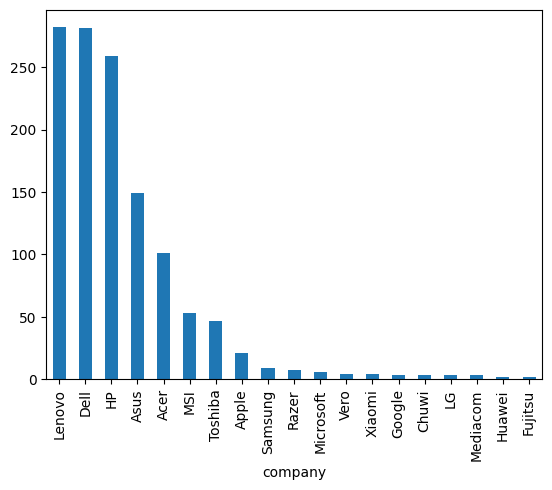

In [536]:
laptopDF['company'].value_counts().plot(kind = 'bar')

<Axes: xlabel='typename'>

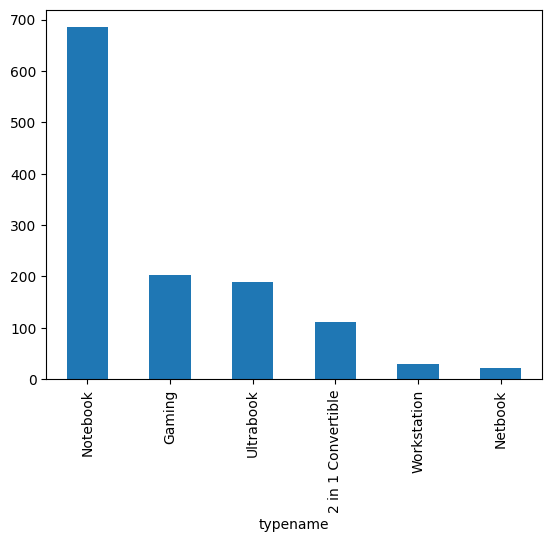

In [537]:
laptopDF['typename'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

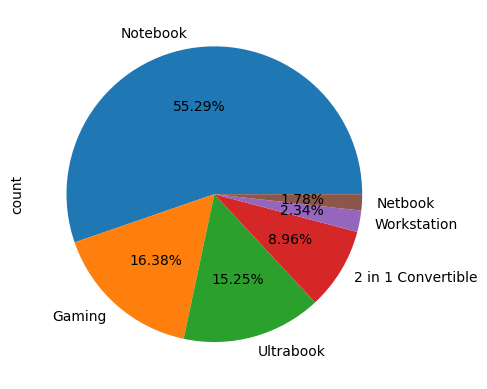

In [538]:
laptopDF['typename'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

In [539]:
import seaborn as sns
import matplotlib.pyplot as plt

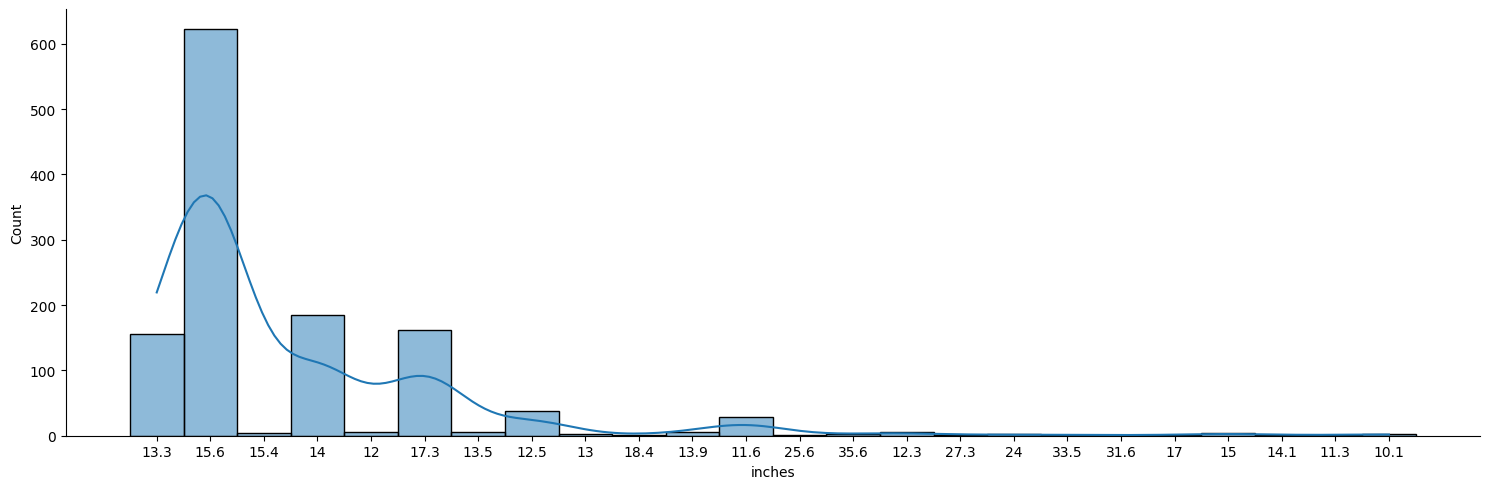

In [540]:
sns.displot(data = laptopDF , x = 'inches' , kind = 'hist' , kde = True ,height=5, aspect=3)

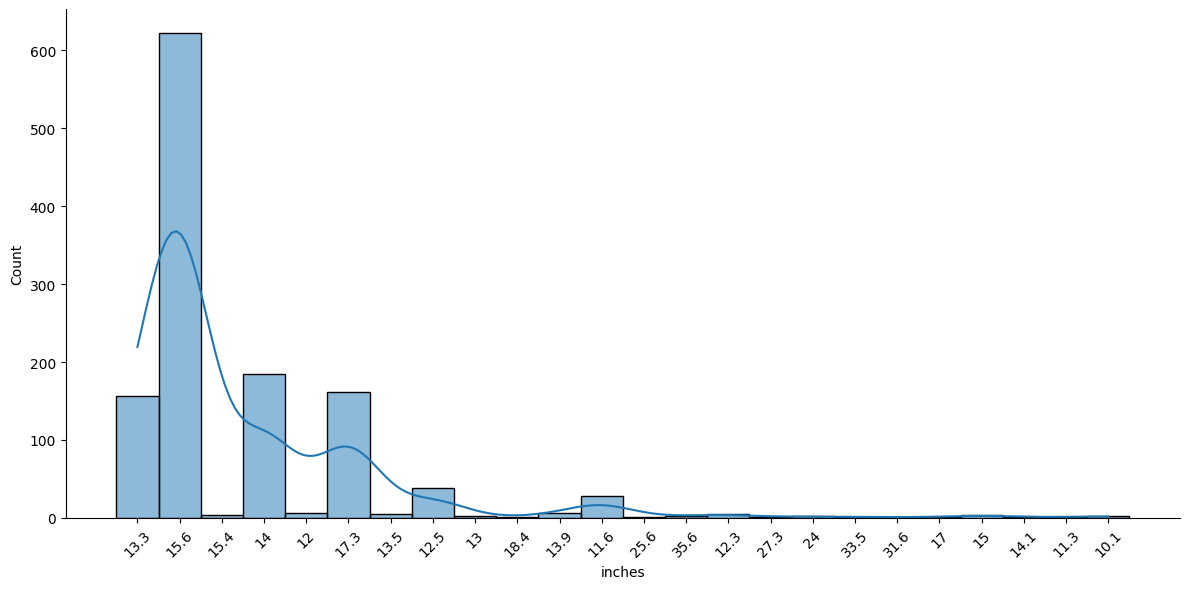

In [541]:


sns.displot(
    data=laptopDF,
    x='inches',
    kind='hist',
    kde=True,
    height=6,      # height of the figure in inches
    aspect=2       # width = height * aspect (makes it wider)
)

plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


<Axes: xlabel='ram'>

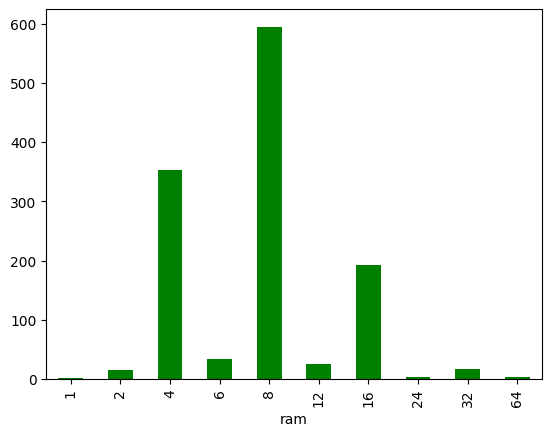

In [542]:
laptopDF['ram'].value_counts().sort_index().plot(kind = 'bar', color='green')

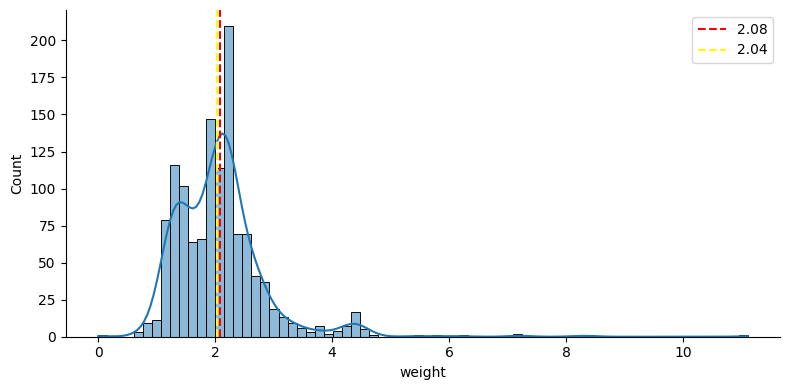

In [543]:
sns.displot(data = laptopDF, kind = 'hist', x = 'weight', kde = True,height=4,aspect=2)
plt.axvline(laptopDF['weight'].mean(), color = 'red', linestyle = 'dashed', label = np.round(laptopDF['weight'].mean(),2))
plt.axvline(laptopDF['weight'].median(), color = 'yellow', linestyle = 'dashed', label = np.round(laptopDF['weight'].median(),2))
plt.legend()
plt.show()

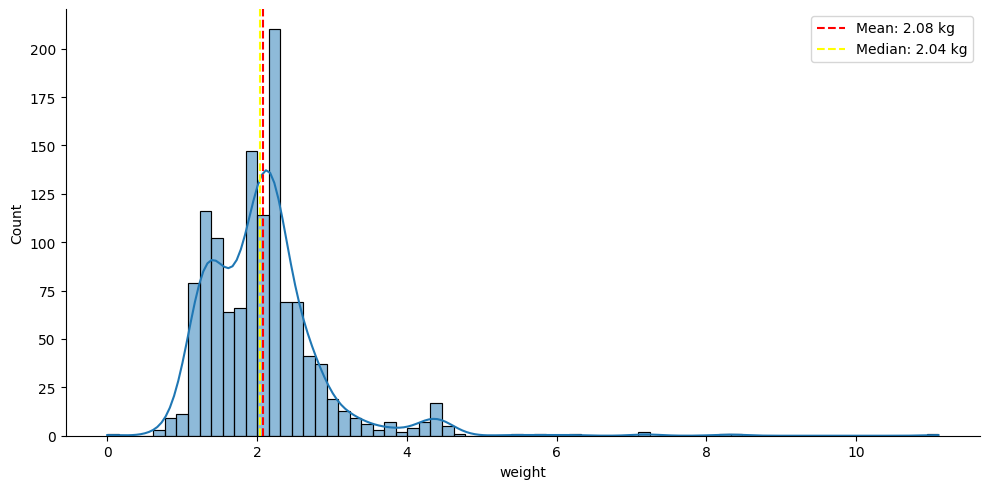

In [544]:


# Plot histogram with KDE
sns.displot(data=laptopDF, kind='hist', x='weight', kde=True, height=5, aspect=2)

# Calculate mean and median
mean_weight = laptopDF['weight'].mean()
median_weight = laptopDF['weight'].median()

# Add vertical lines with descriptive labels
plt.axvline(mean_weight, color='red', linestyle='dashed', 
            label=f"Mean: {np.round(mean_weight, 2)} kg")
plt.axvline(median_weight, color='yellow', linestyle='dashed', 
            label=f"Median: {np.round(median_weight, 2)} kg")

# Show legend
plt.legend()
plt.show()


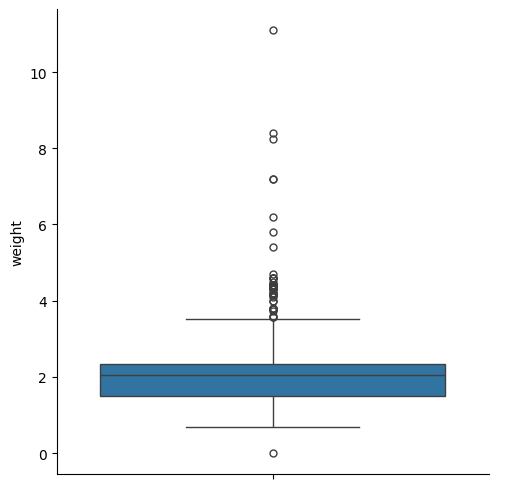

In [545]:
sns.catplot(data = laptopDF, kind = 'box' , y = 'weight')

In [546]:
### Upper Bound
outlier_weight_index_U = laptopDF[laptopDF['weight'] > 3.5].index
laptopDF.loc[outlier_weight_index_U, 'weight'] = 3.5

In [547]:
### Lower Bound
outlier_weight_index_L = laptopDF[laptopDF['weight'] < 1].index
laptopDF.loc[outlier_weight_index_L, 'weight'] = 1

In [548]:
def categorical_plotter(df,col):
    fig = plt.figure(figsize = (12,6))
    ax1 = fig.add_subplot(1,2,1)
    df[col].value_counts().plot(kind = 'bar', ax = ax1)
    ax1.set_title(f'Freq Plot Of {col}')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Freq')

    ax2 = fig.add_subplot(1,2,2)
    df[col].value_counts().plot(kind = 'pie', ax = ax2, autopct = '%1.2f%%')
    ax2.set_title(f'Pie Chart Of {col}')
    ax2.set_xlabel(col)

    plt.tight_layout()
    plt.show()

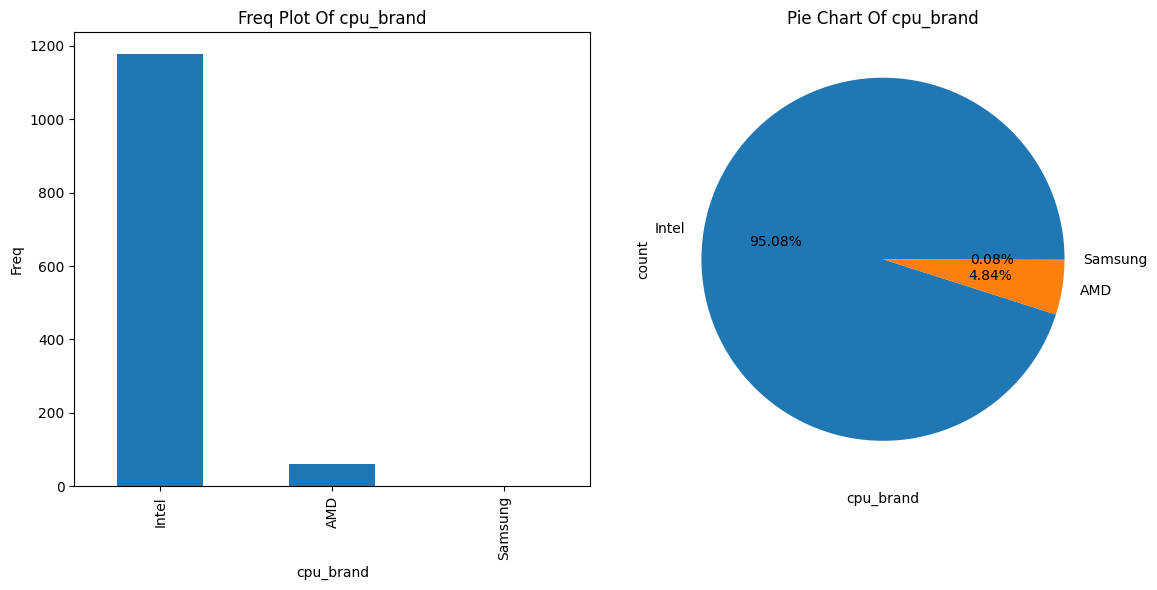

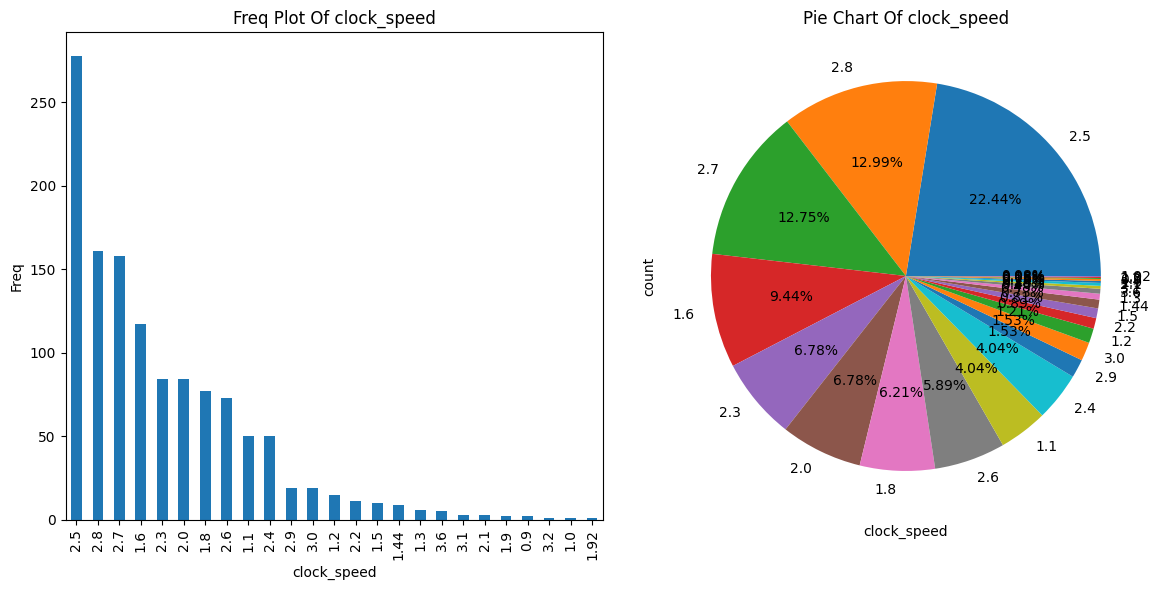

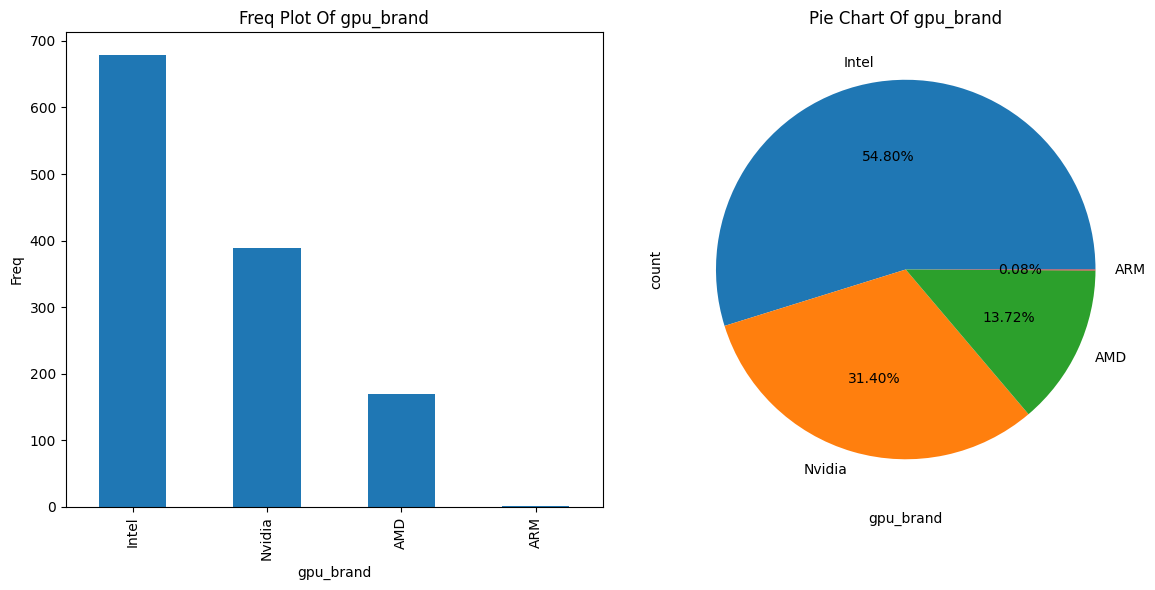

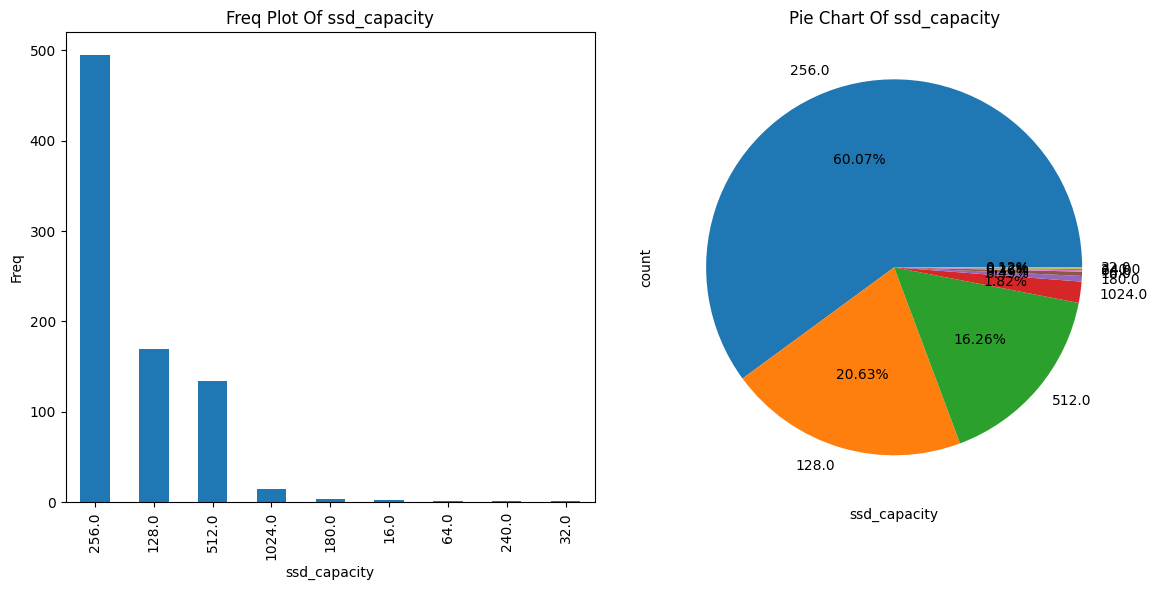

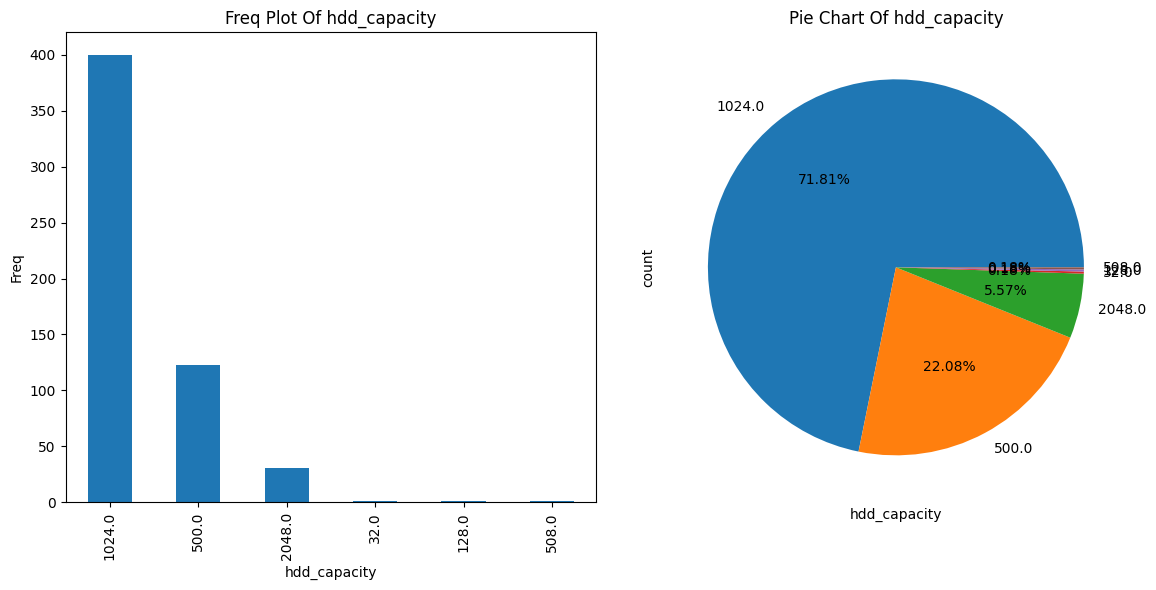

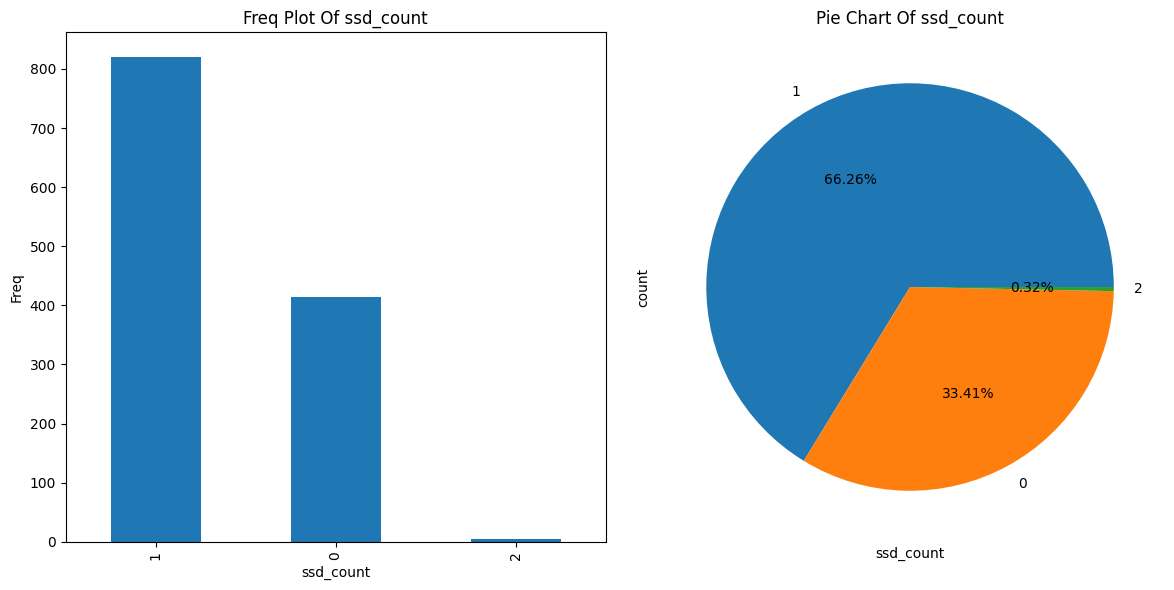

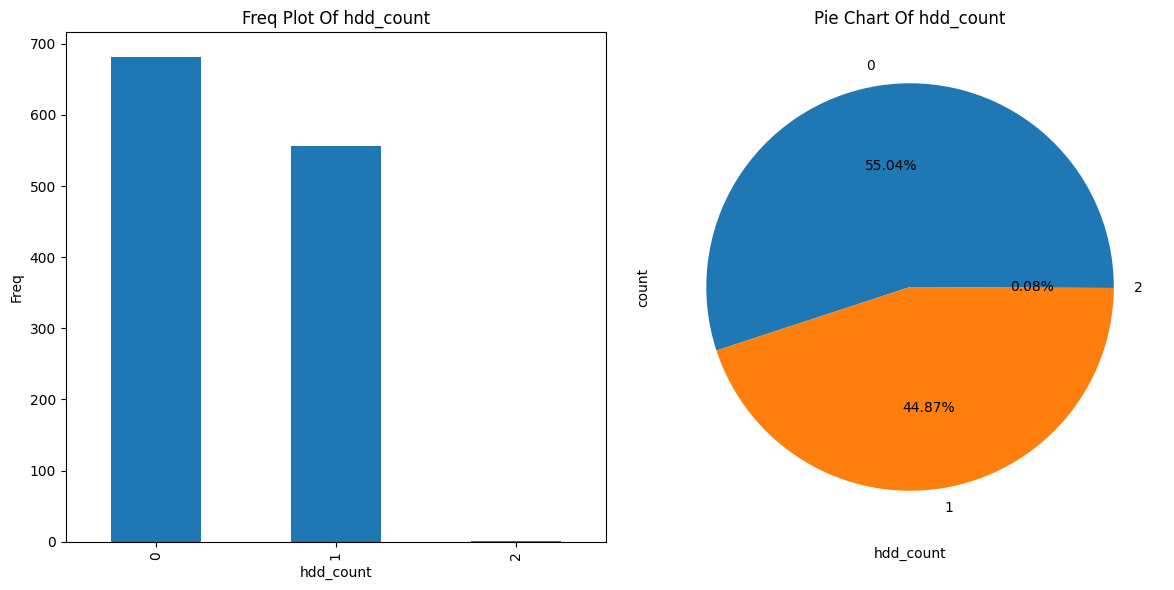

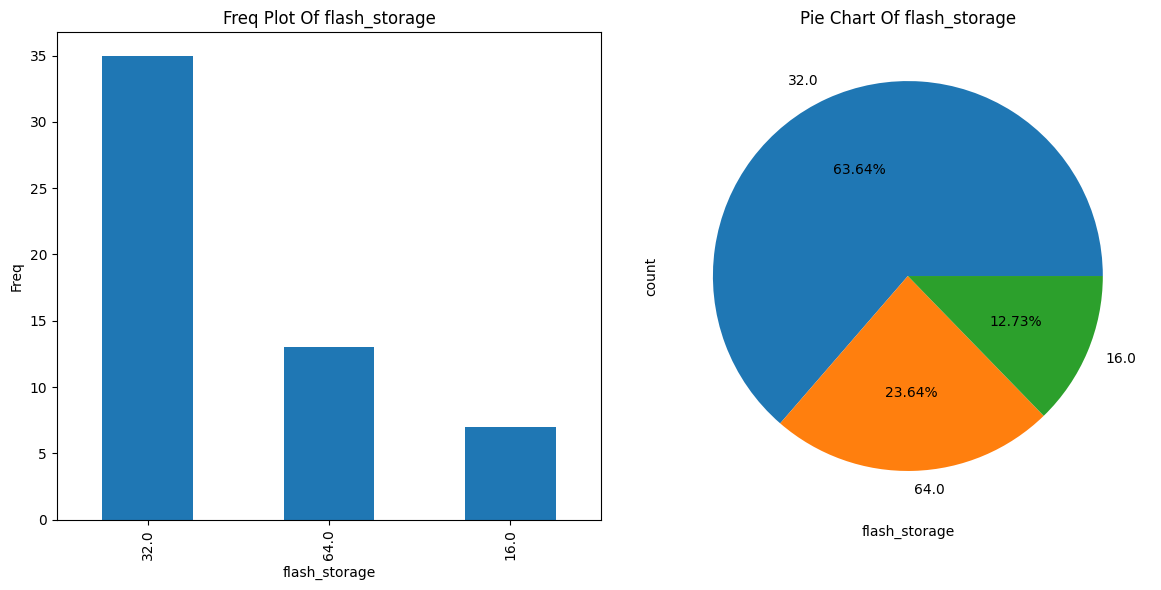

In [549]:
rem_categorical_columns = ['cpu_brand',
       'clock_speed', 'gpu_brand', 'ssd_capacity', 'hdd_capacity', 'ssd_count',
       'hdd_count', 'flash_storage']

for i in rem_categorical_columns:
    categorical_plotter(laptopDF, i)

### Bivariate Analysis ###

<Axes: >

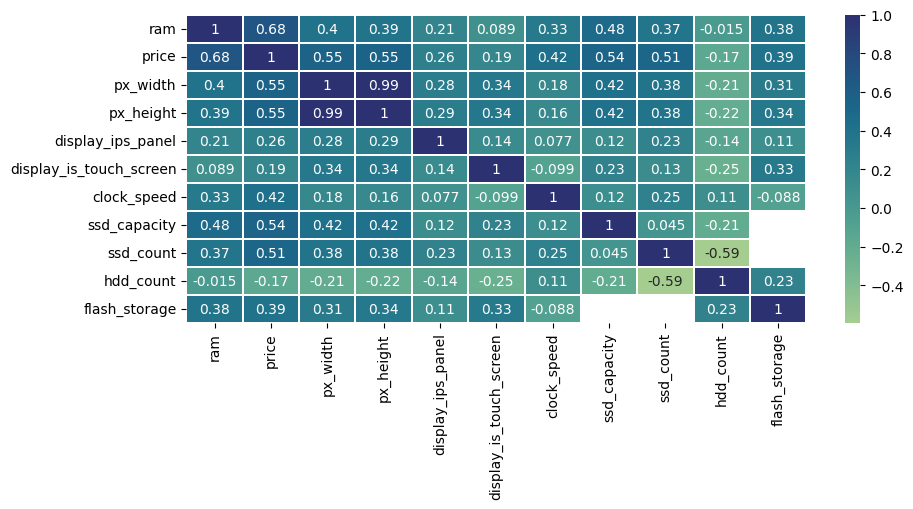

In [550]:
plt.figure(figsize=(10,4))
sns.heatmap(laptopDF.select_dtypes(include=[np.float64, np.int64, bool]).corr(), cmap = 'crest', annot= True, linewidths=0.2)

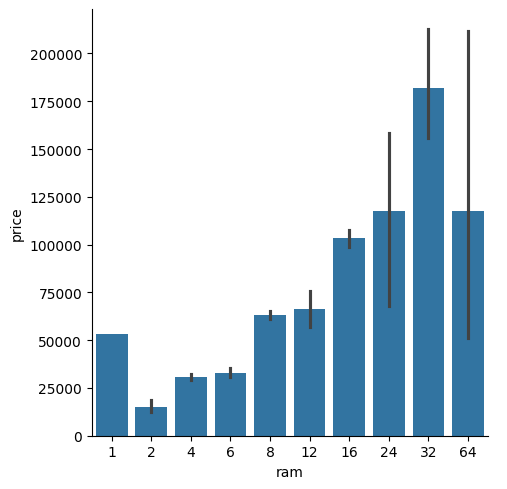

In [551]:
#numerical - categorical
#price - ram
sns.catplot(kind='bar', data=laptopDF, x='ram', y='price')

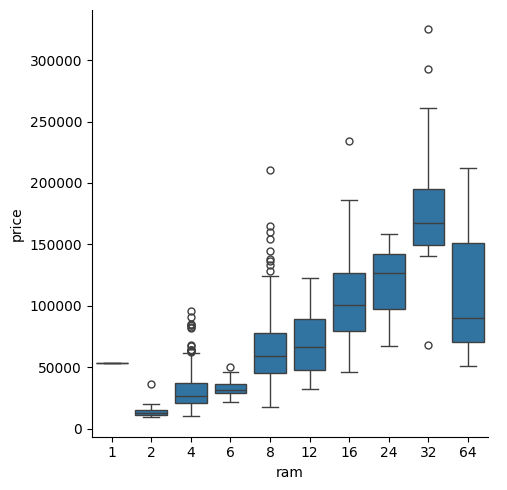

In [552]:
sns.catplot(kind='box', data=laptopDF, x='ram', y='price')

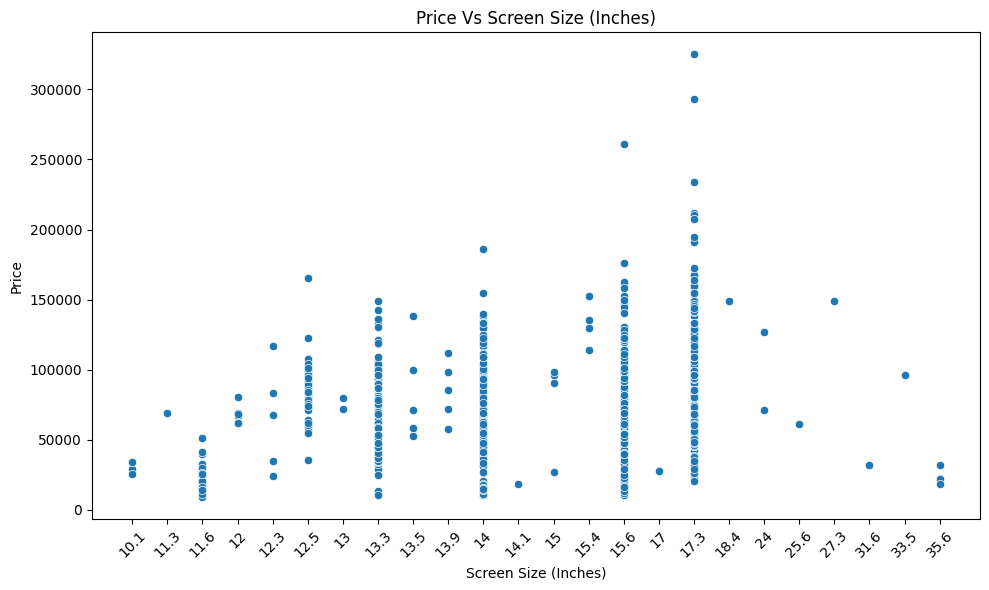

In [553]:
laptopDF_sorted = laptopDF.sort_values(by='inches', ascending=True)
plt.figure(figsize=(10,6))
sns.scatterplot(data=laptopDF_sorted, x='inches', y='price')
plt.title('Price Vs Screen Size (Inches)')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


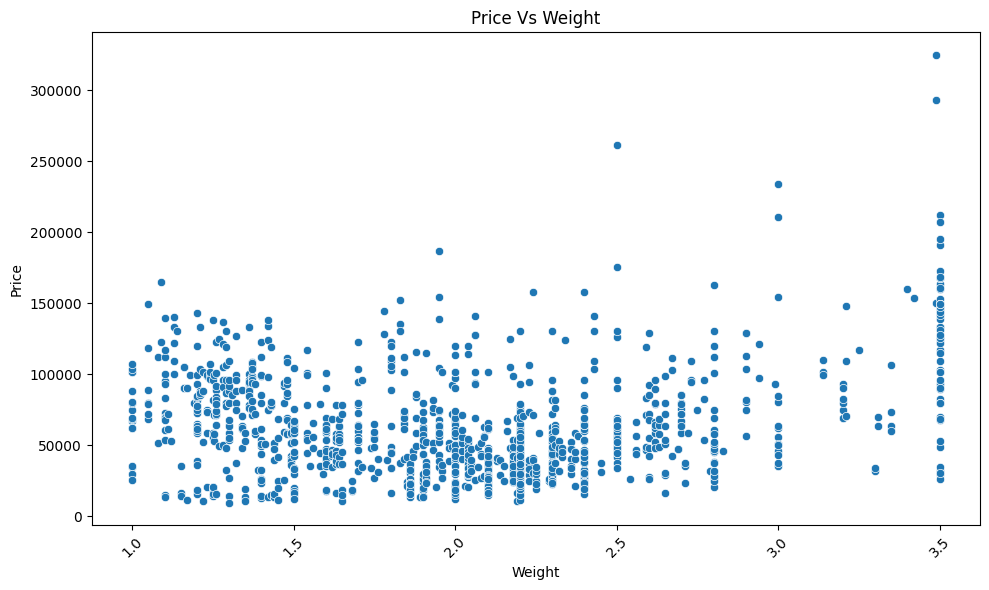

In [554]:
laptopDF_sorted = laptopDF.sort_values(by='weight', ascending=True)
plt.figure(figsize=(10,6))
sns.scatterplot(data=laptopDF_sorted, x='weight', y='price')
plt.title('Price Vs Weight')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

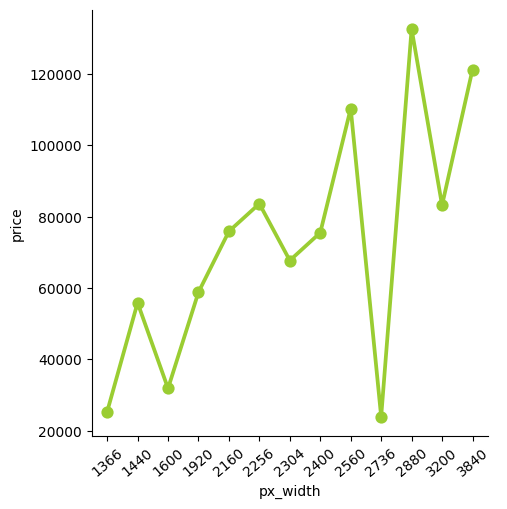

In [555]:
sns.catplot(data=laptopDF,kind='point',x='px_width',y='price',estimator='median',errorbar=None, color='yellowgreen')
plt.xticks(rotation=40)
plt.show()

Text(0.5, 0.98, 'Price vs Clock Speed across CPU Brands')

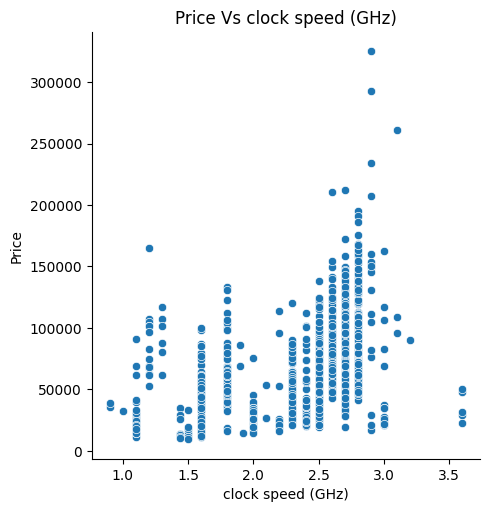

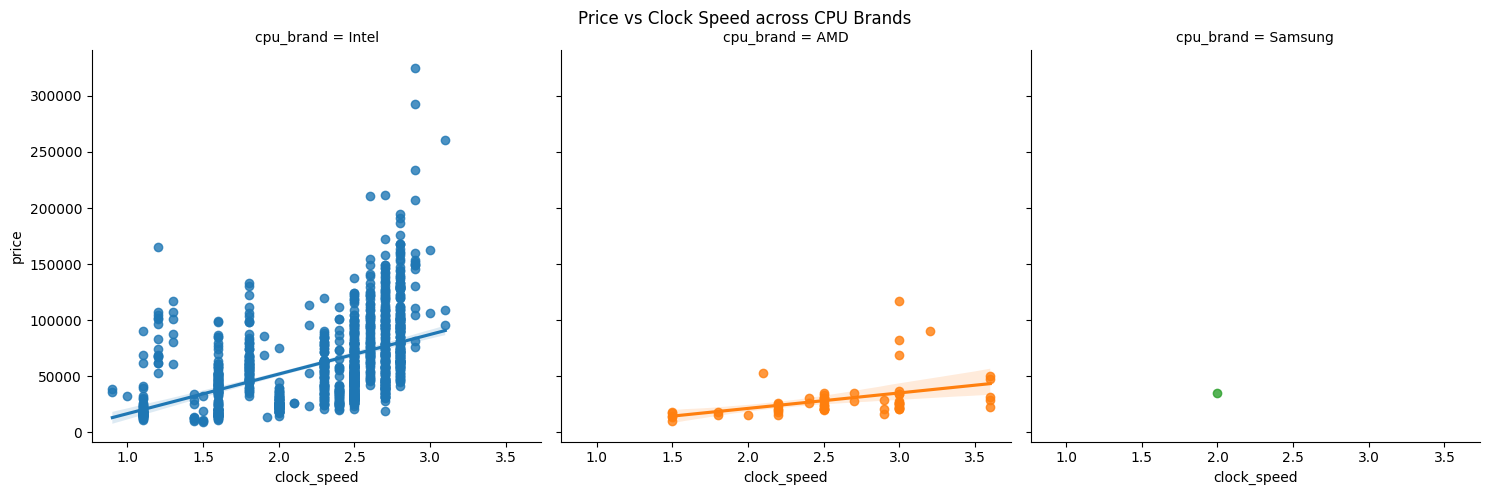

In [556]:
#price vs clock speed 
#numerical vs numerical column
sns.relplot(data=laptopDF,x='clock_speed',y='price', kind='scatter')
plt.title('Price Vs clock speed (GHz)')
plt.xlabel('clock speed (GHz)')
plt.ylabel('Price')

#generally the price tends to increase but - even at same clock_speed the price tends to fluctuate.
sns.lmplot(data=laptopDF, x='clock_speed', y='price', hue='cpu_brand', col='cpu_brand', col_wrap=3)
plt.subplots_adjust(top=0.9)
plt.suptitle('Price vs Clock Speed across CPU Brands')#regression plot
#the price increases for every brand cpu as the closk speed increases.

0.39830691946764


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, '1366'),
  Text(0, 1.5, '1440'),
  Text(0, 2.5, '1600'),
  Text(0, 3.5, '1920'),
  Text(0, 4.5, '2160'),
  Text(0, 5.5, '2256'),
  Text(0, 6.5, '2304'),
  Text(0, 7.5, '2400'),
  Text(0, 8.5, '2560'),
  Text(0, 9.5, '2736'),
  Text(0, 10.5, '2880'),
  Text(0, 11.5, '3200'),
  Text(0, 12.5, '3840')])

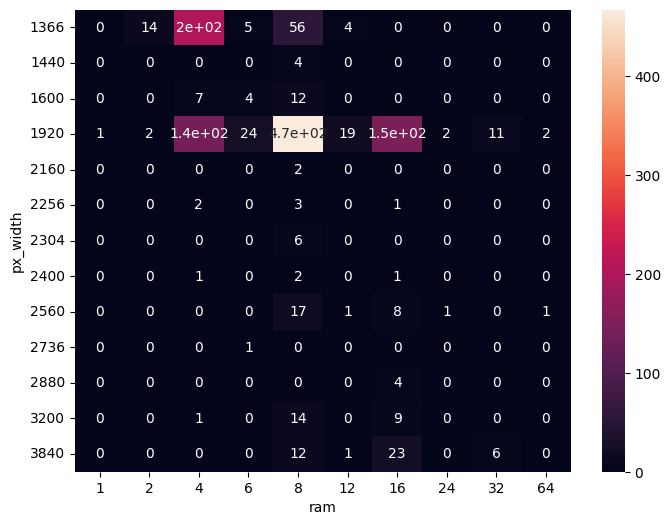

In [557]:
#ram vs px_width
print(laptopDF['px_width'].corr(laptopDF['ram']))
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(index=laptopDF['px_width'],columns=laptopDF['ram']),annot=True)
plt.yticks(rotation=0)

In [558]:
#kaggle laptop selection data eda

In [559]:
laptopDF.describe(include ='all')

,company,typename,inches,screenresolution,cpu,ram,opsys,weight,price,px_width,...,display_ips_panel,display_is_touch_screen,cpu_brand,clock_speed,gpu_brand,ssd_capacity,hdd_capacity,ssd_count,hdd_count,flash_storage
count,1239,1239,1239,1239,1239,1239.000000,1239,1239.0,1239.000000,1239.000000,...,1239,1239,1239,1239.000000,1239,824.000000,557.0,1239.000000,1239.000000,55.000000
unique,19,6,24,40,118,NaN,6,149.0,NaN,NaN,...,2,2,3,NaN,4,NaN,6.0,NaN,NaN,NaN
top,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,NaN,Windows,2.2,NaN,NaN,...,False,False,Intel,NaN,Intel,NaN,1024.0,NaN,NaN,NaN
freq,282,685,622,492,183,NaN,1070,109.0,NaN,NaN,...,891,1057,1178,NaN,679,NaN,400.0,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,8.546408,NaN,NaN,60784.792887,1900.389023,...,NaN,NaN,NaN,2.307974,NaN,283.436893,NaN,0.669088,0.450363,37.527273
std,NaN,NaN,NaN,NaN,NaN,5.590718,NaN,NaN,37393.505426,493.588993,...,NaN,NaN,NaN,0.500905,NaN,156.190099,NaN,0.477546,0.499351,15.766649
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,9270.720000,1366.000000,...,NaN,NaN,NaN,0.900000,NaN,16.000000,NaN,0.000000,0.000000,16.000000
25%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,32793.840000,1920.000000,...,NaN,NaN,NaN,2.000000,NaN,256.000000,NaN,0.000000,0.000000,32.000000
50%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,52747.200000,1920.000000,...,NaN,NaN,NaN,2.500000,NaN,256.000000,NaN,1.000000,0.000000,32.000000
75%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,79840.080000,1920.000000,...,NaN,NaN,NaN,2.700000,NaN,256.000000,NaN,1.000000,1.000000,32.000000


In [560]:
from IPython.core.getipython import get_ipython

# Text block summarizing the types of analyses and skills a data analyst should know
analyst_knowledge_summary = """
## 📘 Summary: Types of Analysis and Skills for Data Analysts

### 🔑 Core Types of Data Analysis

**1. Descriptive Analysis (What happened?)**
- Summarizes main features of the dataset.
- Tools: `.describe()`, `.info()`, mean, median, mode, standard deviation.
- Visuals: Histograms, bar charts, pie charts, box plots.

**2. Diagnostic Analysis (Why did it happen?)**
- Understands the causes behind trends or outcomes.
- Methods: Correlation analysis, hypothesis testing (t-test, chi-square, ANOVA), feature comparison.

**3. Predictive Analysis (What is likely to happen?)**
- Uses statistical and machine learning models to forecast future trends.
- Techniques: Linear regression, logistic regression, decision trees, time series forecasting.

**4. Prescriptive Analysis (What should be done?)**
- Recommends actions based on data.
- Methods: Optimization, scenario analysis, A/B testing.

---

### 🧠 Must-Know Techniques for an Analyst

| Category                  | Techniques / Concepts                           |
|--------------------------|--------------------------------------------------|
| 📊 **Exploratory Data Analysis (EDA)**   | Box plots, scatter plots, heatmaps, distributions |
| 📈 **Statistical Tests**        | t-test, ANOVA, chi-square, p-values            |
| 🤖 **Machine Learning Basics**  | Regression, classification, clustering         |
| 🔄 **Feature Engineering**      | Normalization, encoding, binning               |
| 🧼 **Data Cleaning**            | Handling nulls, duplicates, fixing data types  |
| 🔗 **Data Joining & Reshaping** | `merge()`, `concat()`, pivoting                |
| 📉 **Dimensionality Reduction** | PCA, t-SNE (for large feature sets)           |
| 🧪 **A/B Testing**              | Controlled experiments to compare strategies   |
| 🗓 **Time Series Analysis**     | Trends, seasonality, ARIMA, ETS models         |
| 🧾 **Business Intelligence**    | Dashboards, KPIs, reporting tools              |
| 🧪 **Model Evaluation**         | Accuracy, precision, recall, RMSE, R²          |

---

### 📚 Additional Skills Analysts Should Learn

- **SQL** – Working with relational databases.
- **Python/R** – Advanced analysis and data automation.
- **Excel** – Quick analysis and business reporting.
- **Data Visualization** – Using Tableau, Power BI.
- **Big Data Tools** *(advanced roles)* – Hadoop, Spark.
- **Cloud Platforms** *(in-demand)* – AWS, GCP, Azure.
"""

# Displaying as Markdown in notebook
get_ipython().run_cell_magic("markdown", "", analyst_knowledge_summary)



## 📘 Summary: Types of Analysis and Skills for Data Analysts

### 🔑 Core Types of Data Analysis

**1. Descriptive Analysis (What happened?)**
- Summarizes main features of the dataset.
- Tools: `.describe()`, `.info()`, mean, median, mode, standard deviation.
- Visuals: Histograms, bar charts, pie charts, box plots.

**2. Diagnostic Analysis (Why did it happen?)**
- Understands the causes behind trends or outcomes.
- Methods: Correlation analysis, hypothesis testing (t-test, chi-square, ANOVA), feature comparison.

**3. Predictive Analysis (What is likely to happen?)**
- Uses statistical and machine learning models to forecast future trends.
- Techniques: Linear regression, logistic regression, decision trees, time series forecasting.

**4. Prescriptive Analysis (What should be done?)**
- Recommends actions based on data.
- Methods: Optimization, scenario analysis, A/B testing.

---

### 🧠 Must-Know Techniques for an Analyst

| Category                  | Techniques / Concepts                           |
|--------------------------|--------------------------------------------------|
| 📊 **Exploratory Data Analysis (EDA)**   | Box plots, scatter plots, heatmaps, distributions |
| 📈 **Statistical Tests**        | t-test, ANOVA, chi-square, p-values            |
| 🤖 **Machine Learning Basics**  | Regression, classification, clustering         |
| 🔄 **Feature Engineering**      | Normalization, encoding, binning               |
| 🧼 **Data Cleaning**            | Handling nulls, duplicates, fixing data types  |
| 🔗 **Data Joining & Reshaping** | `merge()`, `concat()`, pivoting                |
| 📉 **Dimensionality Reduction** | PCA, t-SNE (for large feature sets)           |
| 🧪 **A/B Testing**              | Controlled experiments to compare strategies   |
| 🗓 **Time Series Analysis**     | Trends, seasonality, ARIMA, ETS models         |
| 🧾 **Business Intelligence**    | Dashboards, KPIs, reporting tools              |
| 🧪 **Model Evaluation**         | Accuracy, precision, recall, RMSE, R²          |

---

### 📚 Additional Skills Analysts Should Learn

- **SQL** – Working with relational databases.
- **Python/R** – Advanced analysis and data automation.
- **Excel** – Quick analysis and business reporting.
- **Data Visualization** – Using Tableau, Power BI.
- **Big Data Tools** *(advanced roles)* – Hadoop, Spark.
- **Cloud Platforms** *(in-demand)* – AWS, GCP, Azure.
